<a href="https://colab.research.google.com/github/HERO-DS/Coursera/blob/main/Machine_Learning_Bank_Crisis_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bank Crisis Detection

#Introduction



Banking crises have long shaped the global financial environment, often resulting in severe economic instability and unpredictability. Such crises, marked by the collapse of financial institutions, liquidity constraints, and eroding investor confidence, have far-reaching consequences, particularly on international trade. Exports, a critical component of economic growth and sustainability, are especially susceptible to disruptions caused by banking crises. Gaining a clearer understanding of the connection between financial instability and export performance is essential for policymakers, economists, and industry leaders seeking to mitigate risks and build economic resilience.

This research utilizes the "Banking Crisis and Exports Dataset," hosted on Kaggle, which provides an extensive set of data on banking crises and their influence on exports across various countries and time frames. The dataset offers a robust foundation for identifying patterns, exploring trends, and examining correlations to uncover how banking crises affect export activities. By analysing this dataset, the study aims to investigate the relationship between financial instability and trade, highlighting the key factors that contribute to fluctuations in export performance during and after periods of economic crisis.

The primary objectives of this thesis are to answer critical questions: To determine whether this crisis will continue in the future. By employing quantitative analysis and data-driven modelling, this research endeavours to provide an in-depth understanding of the link between financial instability and international trade. The outcomes of this study will enhance the current understanding of economic crises and offer actionable insights for policymakers and stakeholders to address the challenges posed by financial instability effectively.



In [ ]:
# Install dependencies

import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import boxcox
from google.colab import drive

In [ ]:
# Import data
url="https://datacatalogfiles.worldbank.org/ddh-published/0041188/DR0051435/finaldataset_1.csv?versionId=2023-01-19T05:04:48.2504395Z"
df = pd.read_csv(url)

In [ ]:
df.head()

,exporter,year,product,tradevalue,tradeshare,expgrowth,expgrowthTRIM,BANK,BANK_W3,TWIN,...,CCC,RZyoung,rznoncrisis,caplab,rd,homogeneity,n,herf,intout,contcrisis
0,ARG,1980.0,3111,1.095743e+06,NaN,NaN,NaN,0.0,0,0.0,...,0.425463,0.66,0.05,25.17,0.01,0.0,1.333,0.497,1.226,0
1,ARG,1981.0,3111,1.053351e+06,NaN,-0.039456,-0.039456,0.0,0,0.0,...,0.425463,0.66,0.05,25.17,0.01,0.0,1.333,0.497,1.226,0
2,ARG,1982.0,3111,8.524701e+05,NaN,-0.211594,-0.211594,0.0,0,0.0,...,0.425463,0.66,0.05,25.17,0.01,0.0,1.333,0.497,1.226,0
3,ARG,1983.0,3111,6.446367e+05,0.252277,-0.279451,-0.279451,0.0,0,0.0,...,0.425463,0.66,0.05,25.17,0.01,0.0,1.333,0.497,1.226,0
4,ARG,1984.0,3111,4.481481e+05,0.236616,-0.363563,-0.363563,0.0,0,0.0,...,0.425463,0.66,0.05,25.17,0.01,0.0,1.333,0.497,1.226,0


In [ ]:
df.shape

(39588, 44)

# **Data Understanding**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_dictionary = pd.read_csv('/content/drive/MyDrive/WQD7006 - Machine Learning/Data Dictionary.csv')
df_cause_impact = pd.read_csv('/content/drive/MyDrive/WQD7006 - Machine Learning/Cause and Impact.csv')

In [ ]:
# Set pandas to display all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Display the entire DataFrame
df_dictionary.head(50)

,Column Name,Description,Layman-Term Explanation,Min Value,Max Value,Unit,Indicator Type,Usage
0,exporter,Reporter,The country exporting goods.,NaN,NaN,Country name or code,Identifier,Excluded
1,year,Year,The calendar year of the data.,1.980000e+03,2.006000e+03,"Year value, e.g., 1980",Identifier,Excluded
2,product,Product,"The specific product category, coded numerically.",3.111000e+03,3.909000e+03,Categorical or product code,Identifier,Excluded
3,tradevalue,Total value of exports (thousands USD),The total monetary value of exports in thousan...,1.000000e+00,1.360298e+08,Thousands of USD,Economic Indicator,Feature
4,tradeshare,Share of the industry in total exports in t-3,The percentage share of this product in the co...,4.280000e-09,9.521001e-01,Percentage (%),Economic Indicator,Feature
5,expgrowth,Export growth rate (log difference),The rate at which exports have increased or de...,-8.565605e+00,8.630626e+00,Logarithmic rate,Economic Indicator,Feature
6,expgrowthTRIM,Trimmed growth rate (5% at each tail),Smoothed growth rate to remove extreme values.,-1.527041e+00,1.523365e+00,Logarithmic rate,Economic Indicator,Feature
7,BANK,Banking crisis dummy,Whether there was a banking crisis.,0.000000e+00,1.000000e+00,0 or 1,Crisis Context,Feature
8,BANK_W3,Banking crisis - 3 year window,Banking crisis within a 3-year window.,0.000000e+00,1.000000e+00,0 or 1,Crisis Context,Feature
9,TWIN,Twin crisis,Both banking and currency crisis.,0.000000e+00,1.000000e+00,0 or 1,Crisis Context,Feature


In [ ]:
# Set pandas to display all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Display the entire DataFrame
df_cause_impact.head(50)

,Column Name,Description,Layman-Term Explanation,Correlation with contcrisis,Analogy
0,tradevalue,Total value of exports (thousands USD),The total monetary value of exports in thousan...,Higher trade value may indicate resilience or ...,Think of trade value like the size of a ship: ...
1,tradeshare,Share of the industry in total exports in t-3,The percentage share of this product in the co...,"A higher trade share can signify dependency, i...",Trade share is like putting all your eggs in o...
2,expgrowth,Export growth rate (log difference),The rate at which exports have increased or de...,Rapid export growth might expose an economy to...,Export growth is like a car speeding on the hi...
3,expgrowthTRIM,Trimmed growth rate (5% at each tail),Smoothed growth rate to remove extreme values.,Trimmed growth offers a balanced view to asses...,Trimmed growth is like filtering out noisy nei...
4,BANK,Banking crisis dummy,Whether there was a banking crisis.,A banking crisis often signals systemic stress...,A banking crisis is like a sudden engine failu...
5,BANK_W3,Banking crisis - 3 year window,Banking crisis within a 3-year window.,Higher trade value may indicate resilience or ...,Think of trade value like the size of a ship: ...
6,TWIN,Twin crisis,Both banking and currency crisis.,"A higher trade share can signify dependency, i...",Trade share is like putting all your eggs in o...
7,RZ,"External finance dependence (Rajan, Zingales 1...",Measures how much the industry relies on exter...,Rapid export growth might expose an economy to...,Export growth is like a car speeding on the hi...
8,FL,"Dependence on trade credit (Fisman, Love 2003)",Indicates the industry's reliance on credit ex...,Trimmed growth offers a balanced view to asses...,Trimmed growth is like filtering out noisy nei...
9,TANG,"Tangibility (Kroszner, Laeven, Klingebiel 2007)",The proportion of physical assets in a company...,A banking crisis often signals systemic stress...,A banking crisis is like a sudden engine failu...


# **Exploratory Data Analysis (EDA)**

In [ ]:
# List of specific columns to exclude based on user's input
columns_to_exclude = [
    "BANK", "BANK_W3", "TWIN", "RecessionAbroad", "durables", "developed", # 0 or 1 columns
    "developing", "blanguar", "liqsup", "forba", "forbb", "recaps",
    "debtrelief", "recession", "homogeneity", "contcrisis",
    "exporter", "year", "product",  # Identifiers
    "policytot" # Policies implemented
]

# Exclude these columns from the dataset
filtered_numeric = df.drop(columns=columns_to_exclude)


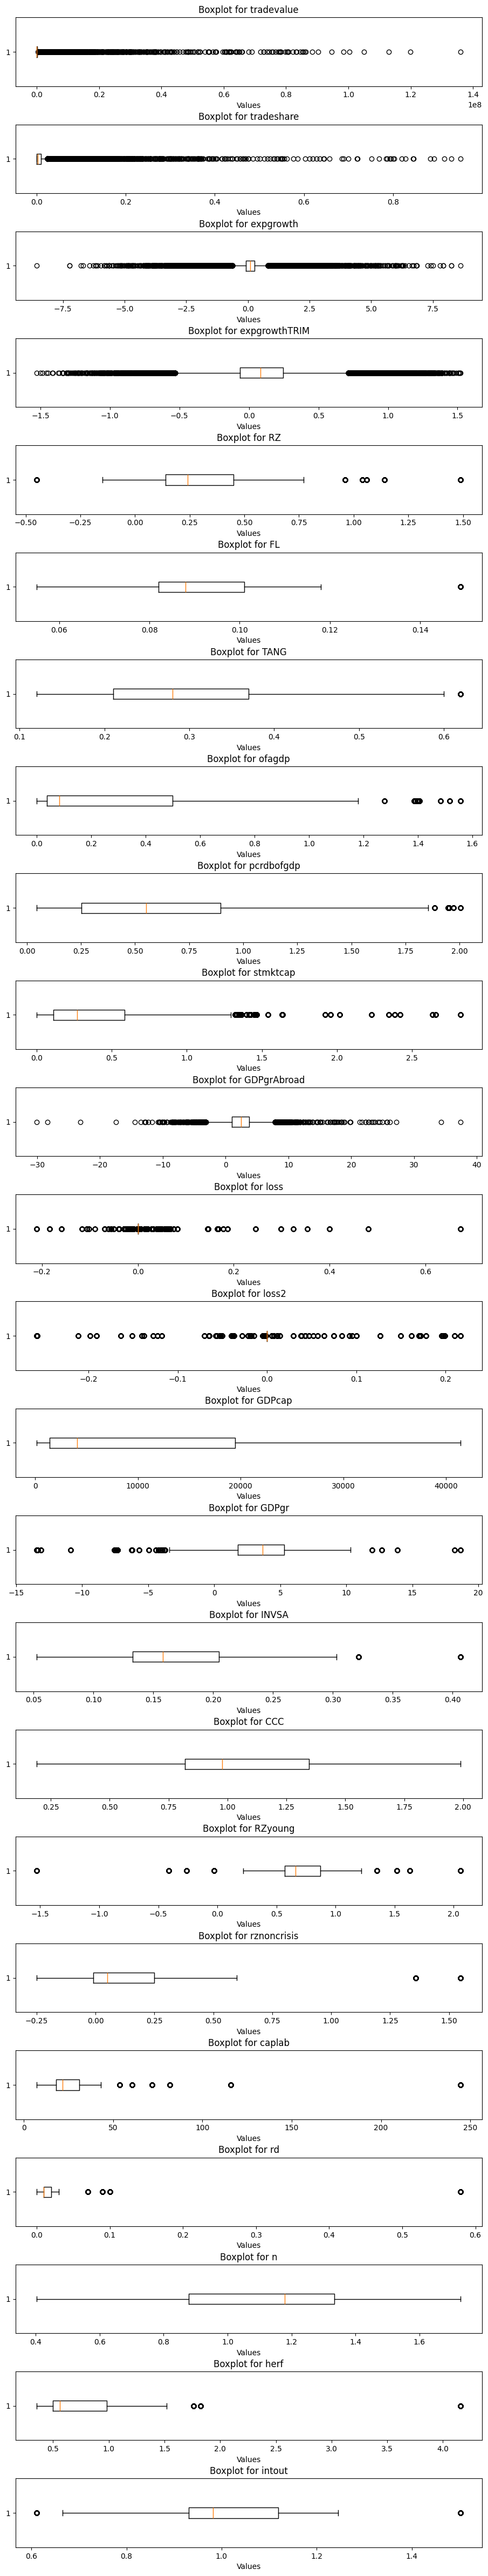

In [ ]:
# Generate individual boxplots for each numeric column
num_columns = filtered_numeric.columns
fig, axes = plt.subplots(nrows=len(num_columns), ncols=1, figsize=(10, len(num_columns) * 2))
fig.tight_layout(pad=3.0)

# Create boxplot for each column
for i, col in enumerate(num_columns):
    axes[i].boxplot(filtered_numeric[col].dropna(), vert=False)
    axes[i].set_title(f"Boxplot for {col}")
    axes[i].set_xlabel("Values")

plt.show()

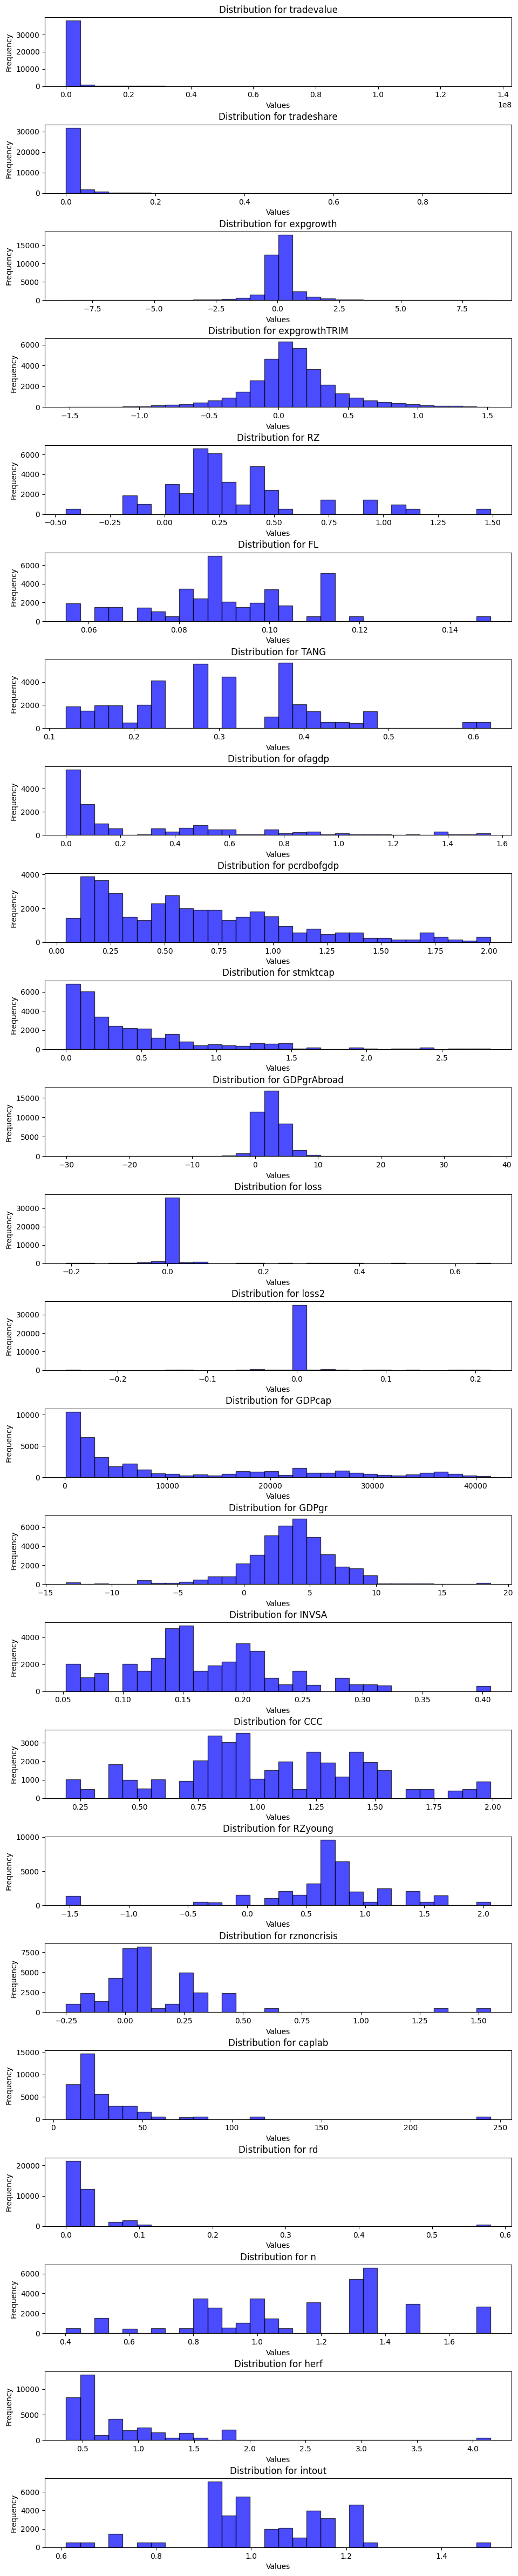

In [ ]:
import matplotlib.pyplot as plt

# Generate individual histograms for each numeric column
num_columns = filtered_numeric.columns
fig, axes = plt.subplots(nrows=len(num_columns), ncols=1, figsize=(10, len(num_columns) * 2))
fig.tight_layout(pad=3.0)

# Create histogram for each column
for i, col in enumerate(num_columns):
    axes[i].hist(filtered_numeric[col].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[i].set_title(f"Distribution for {col}")
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Frequency")

plt.show()


Highlights:

1. Most Variables Have Skewed Data:
- Many of the histograms show distributions that are not balanced, with most of the data clustering at lower values (e.g., tradevalue, tradeshare). This means there are a few very high values pulling the average up, but most data points are small.

2. Outliers Are Common Across Variables:
- In nearly every boxplot, there are noticeable "dots" far from the main grouping of the data, indicating the presence of extreme values.

3. Export Growth Is Near Balanced:
- The variable "expgrowth" has a more symmetric distribution, This indicates that export growth is generally steady.
- The adjusted export growth (expgrowthTRIM) shows a clear normal (bell-shaped) distribution, which suggests that the trimmed data might have removed anomalies, resulting in a more stable and clean pattern.

4. Financial Tangibility (TANG) Is Well-Spread:
- The TANG variable has a wide spread of values, this means different banks/regions show diverse behaviors in terms of asset stability.

5. Debt-Related Variables (ofadgp, pcbrdofadgp):
- Variables related to debt (like pcbrdofadgp) show most data clustered at lower values.This might indicate that a small number of countries carry disproportionate debt burdens.

6. Loss Variables Are Extremely Small:
- The loss variables (loss, loss2) show very tight clustering around zero, meaning most entities experience minimal or no losses, with very few large loss cases.

7. Economic Indicators Vary Widely:
- Variables like GDP per capita (GDPcap) and GDP growth (GDPgr) have wide distributions, suggesting significant differences across countries or regions in economic performance and growth.

8. Market Concentration (herf):
- The "herf" variable, indicating market concentration, is skewed with most values at the lower end. This suggests that most markets are less concentrated (more competitive), but there are a few cases of high concentration.

# **Data Pre-Processing**

In [ ]:
#Identify the categorical column
cat_cols = [cols for cols in df.columns if df[cols].dtypes == 'O']
cat_cols

['exporter']

In [ ]:
# Check for missing values
nan_cols=[]
for col in df.columns:
    if df[col].isnull().sum()>0:
        nan_cols.append(col)
len(nan_cols)

28

In [ ]:
# Fill numerical columns with mean
for col in df.select_dtypes(include=['float64', 'int64']):
    df.loc[:, col] = df[col].fillna(df[col].mean())

In [ ]:
# After handling missing value
nan_cols_updated=[]
for col in df.columns:
    if df[col].isnull().sum()>0:
        nan_cols_updated.append(col)
len(nan_cols_updated)

0

In [ ]:
df.head()

,exporter,year,product,tradevalue,tradeshare,expgrowth,expgrowthTRIM,BANK,BANK_W3,TWIN,...,CCC,RZyoung,rznoncrisis,caplab,rd,homogeneity,n,herf,intout,contcrisis
0,ARG,1980.0,3111,1.095743e+06,0.013819,0.104838,0.098511,0.0,0,0.0,...,0.425463,0.66,0.05,25.17,0.01,0.0,1.333,0.497,1.226,0
1,ARG,1981.0,3111,1.053351e+06,0.013819,-0.039456,-0.039456,0.0,0,0.0,...,0.425463,0.66,0.05,25.17,0.01,0.0,1.333,0.497,1.226,0
2,ARG,1982.0,3111,8.524701e+05,0.013819,-0.211594,-0.211594,0.0,0,0.0,...,0.425463,0.66,0.05,25.17,0.01,0.0,1.333,0.497,1.226,0
3,ARG,1983.0,3111,6.446367e+05,0.252277,-0.279451,-0.279451,0.0,0,0.0,...,0.425463,0.66,0.05,25.17,0.01,0.0,1.333,0.497,1.226,0
4,ARG,1984.0,3111,4.481481e+05,0.236616,-0.363563,-0.363563,0.0,0,0.0,...,0.425463,0.66,0.05,25.17,0.01,0.0,1.333,0.497,1.226,0


In [ ]:
# Calculate range estimate and standard deviation
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    range_estimate = (df[col].max() - df[col].min()) / 4
    std_dev = statistics.stdev(df[col])
    print(f"{col}: Estimate = {range_estimate:.2f}, Std Dev = {std_dev:.2f}")

year: Estimate = 6.50, Std Dev = 7.62
product: Estimate = 199.50, Std Dev = 287.23
tradevalue: Estimate = 34007444.14, Std Dev = 4286242.23
tradeshare: Estimate = 0.24, Std Dev = 0.04
expgrowth: Estimate = 4.30, Std Dev = 0.77
expgrowthTRIM: Estimate = 0.76, Std Dev = 0.31
BANK: Estimate = 0.25, Std Dev = 0.21
BANK_W3: Estimate = 0.25, Std Dev = 0.33
TWIN: Estimate = 0.25, Std Dev = 0.05
RZ: Estimate = 0.48, Std Dev = 0.32
FL: Estimate = 0.02, Std Dev = 0.02
TANG: Estimate = 0.13, Std Dev = 0.11
ofagdp: Estimate = 0.39, Std Dev = 0.24
pcrdbofgdp: Estimate = 0.49, Std Dev = 0.43
stmktcap: Estimate = 0.71, Std Dev = 0.44
RecessionAbroad: Estimate = 0.25, Std Dev = 0.20
GDPgrAbroad: Estimate = 16.88, Std Dev = 2.18
durables: Estimate = 0.25, Std Dev = 0.50
loss: Estimate = 0.22, Std Dev = 0.05
loss2: Estimate = 0.12, Std Dev = 0.04
GDPcap: Estimate = 10324.50, Std Dev = 11728.64
developed: Estimate = 0.25, Std Dev = 0.49
developing: Estimate = 0.25, Std Dev = 0.24
blanguar: Estimate = 0.2

In [ ]:
#Applying standard scaler on selected column with high standard deviation
columns_to_scale = ['tradevalue', 'expgrowth', 'caplab', 'GDPcap']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[columns_to_scale])
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
df= pd.concat([df.drop(columns=columns_to_scale), scaled_df], axis=1)
print(df.head())

  exporter    year  product  tradeshare  expgrowthTRIM  BANK  BANK_W3  TWIN  \
0      ARG  1980.0     3111    0.013819       0.098511   0.0        0   0.0   
1      ARG  1981.0     3111    0.013819      -0.039456   0.0        0   0.0   
2      ARG  1982.0     3111    0.013819      -0.211594   0.0        0   0.0   
3      ARG  1983.0     3111    0.252277      -0.279451   0.0        0   0.0   
4      ARG  1984.0     3111    0.236616      -0.363563   0.0        0   0.0   

     RZ     FL  ...    rd  homogeneity      n   herf  intout  contcrisis  \
0  0.14  0.112  ...  0.01          0.0  1.333  0.497   1.226           0   
1  0.14  0.112  ...  0.01          0.0  1.333  0.497   1.226           0   
2  0.14  0.112  ...  0.01          0.0  1.333  0.497   1.226           0   
3  0.14  0.112  ...  0.01          0.0  1.333  0.497   1.226           0   
4  0.14  0.112  ...  0.01          0.0  1.333  0.497   1.226           0   

   tradevalue  expgrowth    caplab    GDPcap  
0    0.059666   0.000

Skewness of 'tradeshare': 9.74


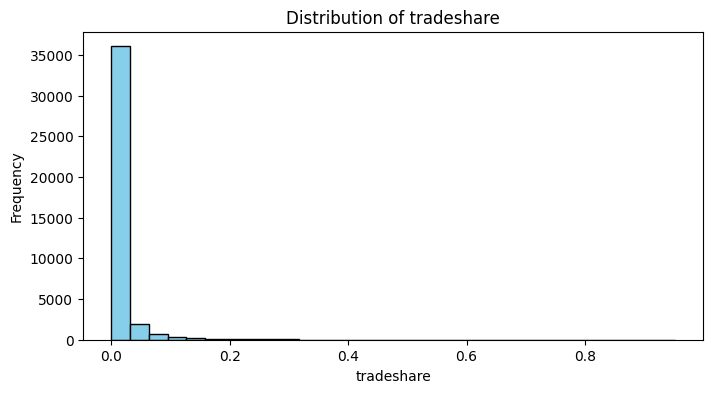

In [ ]:
# Check for skewness
tradeshare_skewness = df['tradeshare'].skew()
print(f"Skewness of 'tradeshare': {tradeshare_skewness:.2f}")
# Plot the original distribution
plt.figure(figsize=(8, 4))
plt.hist(df['tradeshare'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of tradeshare')
plt.xlabel('tradeshare')
plt.ylabel('Frequency')
plt.show()

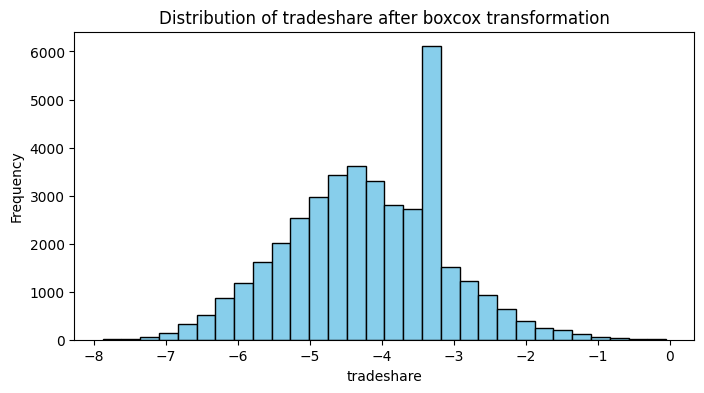

In [ ]:
# Apply Box-Cox transformation
df['tradeshare_boxcox'], lam = boxcox(df['tradeshare'])
# Plot the distribution after applying boxcox
plt.figure(figsize=(8, 4))
plt.hist(df['tradeshare_boxcox'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of tradeshare after boxcox transformation')
plt.xlabel('tradeshare')
plt.ylabel('Frequency')
plt.show()

<Axes: >

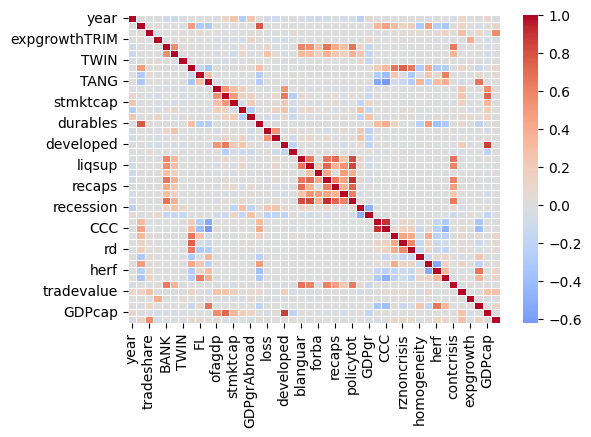

In [ ]:
#Feature Importance
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
)

The heatmap uses color coding to visually differentiate correlation strengths and directions. Red hues indicate strong positive correlations, blue hues signify strong negative correlations, and lighter or neutral shades represent weaker or no correlations. For example, variables like "liqsup", "recession" and "recaps" show high positive correlation with "contcrisis".

# Data Splitting

In [ ]:
X_df=df.drop(columns=['contcrisis'])
Y_df=df['contcrisis']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, Y_df,random_state=0, test_size=0.3)

In [ ]:
Xtrain.shape

(27711, 44)

In [ ]:
print("Number of records in Xtrain:",Xtrain.shape[0])

Number of records in Xtrain: 27711


In [ ]:
Xtest.shape

(11877, 44)

In [ ]:
print("Number of records in Xtrain:",Xtrain.shape[0])

Number of records in Xtrain: 27711


In [ ]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(27711, 44)
(11877, 44)
(27711,)
(11877,)


# Model Building and Evaluation

In [ ]:
# Naive Bayes Model Building

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
X_df, Y_df = make_classification(n_classes=2, random_state=0)
Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, Y_df,random_state=0, test_size=0.3)
Gaussian = GaussianNB()
Gaussian.fit(Xtrain, ytrain)
y_Gaussian = Gaussian.predict(Xtest)
accuracy_GaussianNB = accuracy_score(ytest, y_Gaussian)
print("Accuracy: ", accuracy_GaussianNB)
precision_GaussianNB = precision_score(ytest, y_Gaussian,average='weighted')
print("Precision: ", precision_GaussianNB)
recall_GaussianNB = recall_score(ytest, y_Gaussian,average='weighted')
print("Recall: ", recall_GaussianNB)
f1_GaussianNB = f1_score(ytest, y_Gaussian,average='weighted')
print("F1-score: ", f1_GaussianNB)



Accuracy:  0.8
Precision:  0.8
Recall:  0.8
F1-score:  0.8


In [ ]:
# Random Forest Model Building
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.metrics import confusion_matrix
X_df, Y_df = make_classification(n_classes=2, random_state=0)
Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, Y_df,random_state=0, test_size=0.3)
Random_Forest = RandomForestClassifier(n_estimators=100, random_state=0)
Random_Forest.fit(Xtrain, ytrain)
y_RandomForest = Random_Forest.predict(Xtest)
accuracy_RandomForest = accuracy_score(ytest, y_RandomForest)
print("Accuracy: ", accuracy_RandomForest)
precision_RandomForest = precision_score(ytest, y_RandomForest,average='weighted')
print("Precision: ", precision_RandomForest)
recall_RandomForest = recall_score(ytest, y_RandomForest,average='weighted')
print("Recall: ", recall_RandomForest)
f1_RandomForest = f1_score(ytest, y_RandomForest,average='weighted')
print("F1-score: ", f1_RandomForest)

Accuracy:  0.9
Precision:  0.9031674208144796
Recall:  0.9
F1-score:  0.9005714285714286


In [ ]:
# SVM Model Building

from sklearn import svm
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score
from sklearn.metrics import confusion_matrix
X_df, Y_df = make_classification(n_classes=2, random_state=0)
Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, Y_df,random_state=0, test_size=0.3)
SVM = svm.SVC(kernel='linear')
SVM.fit(Xtrain, ytrain)
y_SVM = SVM.predict(Xtest)
accuracy_svm = accuracy_score(ytest, y_SVM)
print("Accuracy: ", accuracy_svm)
precision_svm = precision_score(ytest, y_SVM,average='weighted')
print("Precision: ", precision_svm)
recall_svm = recall_score(ytest, y_SVM,average='weighted')
print("Recall: ", recall_svm)
f1_svm = f1_score(ytest, y_SVM,average='weighted')
print("F1-score: ", f1_svm)

Accuracy:  0.8333333333333334
Precision:  0.8533333333333334
Recall:  0.8333333333333334
F1-score:  0.8350168350168351


In [ ]:
# Decision Tree Model Building

from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(random_state=0)
X_df, Y_df = make_classification(n_classes=2, random_state=0)
Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, Y_df,random_state=0, test_size=0.3)
DecisionTree.fit(Xtrain, ytrain)
y_DecisionTree = DecisionTree.predict(Xtest)
accuracy_DecisionTree = accuracy_score(ytest, y_DecisionTree)
print("Accuracy: ", accuracy_DecisionTree)
precision_DecisionTree = precision_score(ytest, y_DecisionTree,average='weighted')
print("Precision: ", precision_DecisionTree)
recall_DecisionTree = recall_score(ytest, y_DecisionTree,average='weighted')
print("Recall: ", recall_DecisionTree)
f1_DecisionTree = f1_score(ytest, y_DecisionTree,average='weighted')
print("F1-score: ", f1_DecisionTree)

Accuracy:  0.8333333333333334
Precision:  0.8371040723981902
Recall:  0.8333333333333334
F1-score:  0.8342857142857143


# Result Evaluation + Interpretation

In [ ]:
performance = {'Model': ['Naive Bayes', 'Random Forest', 'SVM', 'Decision Tree'],
               'Accuracy': [0.80, 0.90, 0.83, 0.83],
               'Precision': [0.80, 0.90, 0.85, 0.84],
               'Recall': [0.80, 0.90, 0.83, 0.83],
               'F1-score': [0.80, 0.90, 0.84, 0.83]}

# Create a DataFrame from the dictionary
df = pd.DataFrame(performance)

df.style.set_properties(**{'font-weight': 'bold'})

# Print the DataFrame with a border
with pd.option_context('display.expand_frame_repr', False):
    print(df)

           Model  Accuracy  Precision  Recall  F1-score
0    Naive Bayes      0.80       0.80    0.80      0.80
1  Random Forest      0.90       0.90    0.90      0.90
2            SVM      0.83       0.85    0.83      0.84
3  Decision Tree      0.83       0.84    0.83      0.83


**When comparing the performance of different machine learning models, it is important to consider multiple evaluation metrics, not just accuracy. In this case, we have been provided with accuracy, precision, recall and F1-score values for Naive Bayes, Random Forest, Decision Tree and SVM models for 7:3 train-test-split ratio.**

**In terms of accuracy, Random Forest has the highest value of 0.90, followed by SVM and Decison Tree with 0.83, and Naive Bayes with 0.80. These values indicate that Random Forest is the most accurate model among the four for making predictions on this particular dataset.**

**However, accuracy alone is not always a good indicator of model performance. Precision and recall are also important evaluation metrics that give us a more complete picture of model performance.**

**Precision is a measure of how many of the predictions made by a model are correct. Random Forest has the highest precision value at 0.90, followed by SVM with 0.85, Decision Tree with 0.84 and Naive Bayes with 0.80.**

**Recall is a measure of how many of the actual positive cases the model is able to correctly identify. In this case, Random Forest has the highest recall value of 0.90, followed by SVM and Decision Tree with 0.83 and Naive Bayes with 0.80.**

**F1-score is the harmonic mean of precision and recall and it's a balance between precision and recall. Random Forest has the highest F1 score at 0.90, followed by SVM with 0.84, Decision Tree with 0.83 and Naive Bayes with 0.80.**

**Random Forest is the best model for predicting whether a country continued to experience an economic crisis because it consistently outperforms the other models (Naive Bayes, Decision Tree, and SVM) across all key evaluation metrics. Its robust performance ensures reliable, balanced, and accurate predictions, making it a valuable tool for policymakers and economists to anticipate and respond effectively to ongoing economic crises.** **bold text** **bold text**

#Conclusion


The analysis of the "Banking Crisis and Exports Dataset" highlights the intricate relationship between financial instability and economic performance, particularly in the context of exports. By examining historical data on banking crises and export trends, this study underscores the significant impact that financial disruptions can have on trade dynamics and overall economic stability. Through predictive modelling and data-driven analysis, the research offers valuable insights into the factors that contribute to the occurrence of banking crises and their potential implications for future economic conditions.

The findings demonstrate that key indicators, such as macroeconomic trends, financial institution performance, and export patterns, can serve as early warning signals for an impending banking crisis. Integrating these indicators into predictive models enhances the ability to forecast potential crises, enabling policymakers and stakeholders to implement proactive measures to mitigate risks. By leveraging machine learning techniques and statistical analysis, this report not only identifies past patterns but also establishes a foundation for anticipating future financial disruptions.

In conclusion, the study emphasizes the importance of continuous monitoring of financial and economic data to predict and prevent banking crises. The development of robust predictive models, combined with timely policy interventions, can play a crucial role in safeguarding economic stability and minimizing the adverse effects of financial instability on exports. Future research can expand on this work by incorporating additional data sources and exploring the interplay between other economic variables to further refine predictive capabilities. By advancing predictive methodologies, this research contributes to the ongoing effort to build resilient financial systems and foster sustainable economic growth.
